In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from utils import connect_mongodb, query_data_by_date, process_buffer_data

%matplotlib inline
plt.style.use('default')
sns.set_theme(style="whitegrid")

In [2]:
# Conectar a la base de datos
collection = connect_mongodb()

end_date = datetime.now()
start_date = end_date - timedelta(hours=1)

print(f"Recogiendo datos desde {start_date} a {end_date}")
data = query_data_by_date(collection, start_date, end_date)
df = process_buffer_data(data)

print(f"\nCargados {len(data)} buffers con {len(df)} dispositivos totales")

Recogiendo datos desde 2024-12-19 15:57:50.396712 a 2024-12-19 16:57:50.396712

Cargados 24 buffers con 1036 dispositivos totales


# Estadísticas Buffer

Buffers totales: 24
Media de dispositivos por buffer: 43.166666666666664
Dispositivos máximos en un buffer: 47
Dispositivos mínimos en un buffer: 37
MACs únicas totales: 68
RSSI medio : -76.93050193050193
Tiempo entre buffers: 5.00 seconds


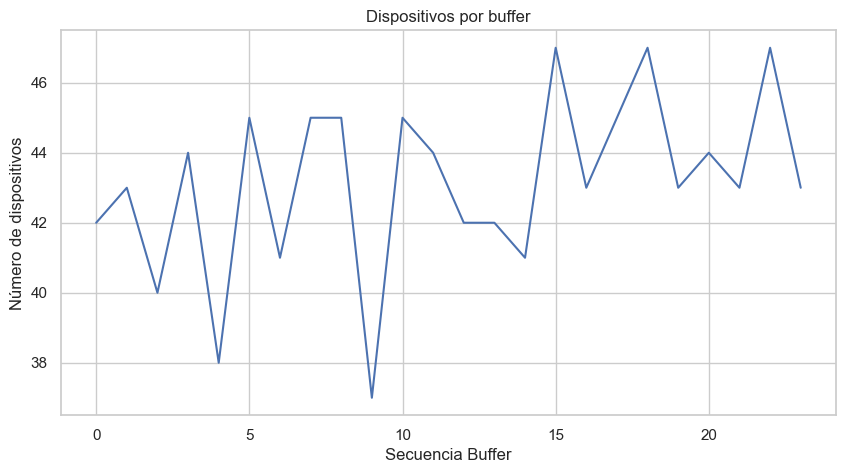

In [3]:
buffer_stats = {
    'Buffers totales': len(data),
    'Media de dispositivos por buffer': df.groupby('sequence')['mac'].count().mean(),
    'Dispositivos máximos en un buffer': df.groupby('sequence')['mac'].count().max(),
    'Dispositivos mínimos en un buffer': df.groupby('sequence')['mac'].count().min(),
    'MACs únicas totales': df['mac'].nunique(),
    'RSSI medio ': df['rssi'].mean(),
    'Tiempo entre buffers': f"{df.groupby('sequence')['timestamp'].first().diff().mean().total_seconds():.2f} seconds"
}

for key, value in buffer_stats.items():
    print(f"{key}: {value}")

# Plot devices per buffer
plt.figure(figsize=(10, 5))
df.groupby('sequence')['mac'].count().plot(kind='line')
plt.title('Dispositivos por buffer')
plt.xlabel('Secuencia Buffer')
plt.ylabel('Número de dispositivos')
plt.grid(True)

# Dispositivos

In [4]:
# Most frequent devices
print("Dispositivos más frecuentes:")
display(df['mac'].value_counts().head(10))

# Address types
#print("\nAddress Type :")
#display(df['addr_type'].value_counts())

# Advertisement types
#print("\nAdvertisement Type:")
#display(df['adv_type'].value_counts())

Top 10 Most Frequent Devices:


mac
A0:EE:4B:4A:79:7A    6
4D:3C:D7:56:AE:D9    6
2B:34:E6:CD:99:77    6
98:01:8D:E0:D6:2E    6
0E:A5:4A:DE:7B:36    6
6C:89:22:B6:98:00    6
34:AF:74:40:5E:76    6
E1:98:03:E1:07:67    6
DB:9F:43:2C:C9:CA    6
32:40:10:49:92:49    6
Name: count, dtype: int64


Address Type Distribution:


addr_type
1    92
0     6
Name: count, dtype: int64


Advertisement Type Distribution:


adv_type
3    50
0    48
Name: count, dtype: int64